# Importación de librerías y lectura del Data Frame

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
import seaborn as sns

In [ ]:
df_secundario = pd.read_csv("/content/drive/MyDrive/secondary_data.csv", delimiter=';')

# Exploración de los datos

Teniendo en cuenta que se utilizaran los mismos criterios que la parte 2, esta sección tiene menos contenido. Cabe aclarar que en este modelo al no ser obligatorio usar todas las columnas, se fueron probando distintas combinaciones hasta conseguir el score pedido.


Elimino las columnas que no voy a usar.

In [ ]:
df_secundario = df_secundario.drop("cap-surface", axis = 1)
df_secundario = df_secundario.drop("stem-root", axis = 1)
df_secundario = df_secundario.drop("stem-surface", axis = 1)
df_secundario = df_secundario.drop("veil-type", axis = 1)
df_secundario = df_secundario.drop("veil-color", axis = 1)
df_secundario = df_secundario.drop("spore-print-color", axis = 1)

Imputación de los Nans.

In [ ]:
# Imputa los Nans dedos un df, la nombre de la features y un caracter.
def imputar_nans(df, nombre_feature, caracter):

  df[nombre_feature] = df[nombre_feature].fillna(caracter)


In [ ]:
imputar_nans(df_secundario, 'gill-attachment', 'o')
imputar_nans(df_secundario, 'gill-spacing', 'o')
imputar_nans(df_secundario, 'ring-type', 'o')

# Preparación de los datos

En esta sección se preparan los datos para realizar un Random Forest de clasificación.


Separo el target del resto del Data Frame.

In [ ]:
X = df_secundario.drop('class', axis=1)

In [ ]:
y = df_secundario['class']

Creo un set de entrenamiento y uno de medición.

In [ ]:
X_train, X_med, y_train, y_med = train_test_split(X, y, test_size=0.2, random_state=13)

Creo un set de testeo y uno de validación a partir del de medición.

In [ ]:
X_test, X_validation, y_test, y_validation = train_test_split(X_med, y_med, test_size=0.5, random_state=13)

Voy a utilizar una variable binaria {0, 1} para representar al target ("class") en donde 1 es para indicar que el hongo es venenoso ('p') y 0 si el hongo es comestible ('e').

In [ ]:
y_train =  y_train.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_validation =  y_validation.map(lambda x: 1 if x == 'p' else 0)

In [ ]:
y_test =  y_test.map(lambda x: 1 if x == 'p' else 0)

Aplico un encoding a todas las columnas. Al igual que en la parte 2, al no tener una gran cantidad de columnas por cada clase, también voy a utilizar OHE para todas las columnas categóricas.

In [ ]:
#Aplica OHE a cada columna dada una feature
def aplicar_ohe(nombre_feature, columnas):

  global X_train, X_test, X_validation
  ohe = OneHotEncoder()
  encoded_train = ohe.fit_transform(X_train[[nombre_feature]]).todense().astype(int)
  encoded_test = ohe.fit_transform(X_test[[nombre_feature]]).todense().astype(int)
  encoded_validation = ohe.transform(X_validation[[nombre_feature]]).todense().astype(int)
  X_train = X_train.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_train))
  X_test = X_test.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_test))
  X_validation = X_validation.reset_index().drop(['index', nombre_feature],axis=1).join(pd.DataFrame(encoded_validation))
  X_train = X_train.rename(columns=columnas)
  X_test = X_test.rename(columns=columnas)
  X_validation = X_validation.rename(columns=columnas)

Con "cap-shape":

In [ ]:
aplicar_ohe('cap-shape', {0:'b0',1:'c0',2:'f0',3:'o0',4:'p0',5:'s0',6:'x0'})

Con "cap-color":

In [ ]:
aplicar_ohe('cap-color', {0:'b2',1:'e2',2:'g2',3:'k2',4:'l2',5:'n2',6:'o2', 7:'p2', 8:'r2', 9:'u2', 10:'w2', 11:'y2'})

Con "does-bruise-or-bleed":

In [ ]:
aplicar_ohe('does-bruise-or-bleed', {0:'f3',1:'t3'})

Con "gill-attachment":

In [ ]:
aplicar_ohe('gill-attachment', {0:'a4',1:'d4',2:'e4',3:'f4',4:'o4',5:'p4',6:'s4', 7:'x4'})

Con "gill-spacing":

In [ ]:
aplicar_ohe('gill-spacing', {0:'c5',1:'d5',2:'f5',3:'o5'})

Con "gill-color":

In [ ]:
aplicar_ohe('gill-color', {0:'b6',1:'e6',2:'f6',3:'g6',4:'k6',5:'n6',6:'o6', 7:'p6', 8:'r6', 9:'u6', 10:'w6', 11:'y6'})

Con "stem-color":

In [ ]:
aplicar_ohe('stem-color', {0:'b9',1:'e9',2:'f9',3:'g9',4:'k9',5:'l9',6:'n9', 7:'o9', 8:'p9', 9:'r9', 10:'u9', 11:'w9', 12:'y9'})

Con has-ring

In [ ]:
aplicar_ohe('has-ring', {0:'f12',1:'t12'})

Con "ring-type":

In [ ]:
aplicar_ohe('ring-type', {0:'e13',1:'f13',2:'g13',3:'l13',4:'m13',5:'o13',6:'p13', 7:'r13', 8:'z13'})

Con "habitat":

In [ ]:
aplicar_ohe('habitat', {0:'d15',1:'g15',2:'h15',3:'l15',4:'m15',5:'p15',6:'u15', 7:'w15'})

Con "season":

In [ ]:
aplicar_ohe('season', {0:'a16',1:'s16',2:'u16',3:'w16'})

In [ ]:
X_train

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,15.74,5.02,28.73,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.27,3.79,5.63,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12.05,6.03,23.98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.08,6.04,14.95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,6.44,12.23,12.77,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,8.53,3.63,25.28,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48851,10.66,5.10,19.52,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48852,1.62,3.73,2.63,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
48853,1.29,5.00,2.45,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_validation

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,2.38,8.13,2.59,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2.35,5.48,2.31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.70,14.78,18.18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5.64,6.76,12.15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.69,7.84,14.56,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,10.65,10.00,22.49,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6103,5.20,12.43,13.25,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6104,8.51,4.52,13.00,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6105,9.27,11.46,32.54,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test

,cap-diameter,stem-height,stem-width,b0,c0,f0,o0,p0,s0,x0,...,h15,l15,m15,p15,u15,w15,a16,s16,u16,w16
0,7.81,6.27,18.18,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,10.96,3.89,26.20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9.27,11.77,18.76,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,7.93,7.56,13.68,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,9.96,8.33,15.72,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,13.53,6.19,16.40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6103,3.55,4.84,6.47,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6104,4.16,5.16,10.51,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6105,4.51,6.44,9.02,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Aclaración: La elección del nombre de las columnas es el mismo usado en la parte 2.

# Entrenamiento y validación del modelo

En esta sección se encuentra el entrenamiento y búsqueda de híper parámetros del modelo mediante los set de entrenamiento y validación.


Realizo un Random Forest de clasificación.

In [ ]:
rf_model = RandomForestClassifier(random_state = 16, n_estimators=12, min_samples_split=2, min_samples_leaf=2,max_features=1, max_depth=None)

params = {'n_estimators': [1, 2, 3, 4,11, 12],
 'min_samples_split': [1, 2],
 'min_samples_leaf': [0, 2],
 'max_depth': [1, None],
 'max_features': [1, 2, 3]}

rs = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=10, random_state=13, scoring='roc_auc')

In [ ]:
rs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

RandomizedSearchCV(estimator=RandomForestClassifier(max_features=1,
                                                    min_samples_leaf=2,
                                                    n_estimators=12,
                                                    random_state=16),
                   param_distributions={'max_depth': [1, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [0, 2],
                                        'min_samples_split': [1, 2],
                                        'n_estimators': [1, 2, 3, 4, 11, 12]},
                   random_state=13, scoring='roc_auc')

In [ ]:
rs.best_params_

{'n_estimators': 12,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 1,
 'max_depth': None}

In [ ]:
model = rs.best_estimator_

Entreno el Random Forest con los mejores híper parámetros.

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1, min_samples_leaf=2, n_estimators=12,
                       random_state=16)

In [ ]:
y_pred_validation = model.predict(X_validation)

In [ ]:
y_pred_validation

array([1, 1, 1, ..., 0, 1, 0])

Realizo una matriz de confusión con el set de validación.

In [ ]:
matriz_confusion_validation = confusion_matrix(y_validation, y_pred_validation)

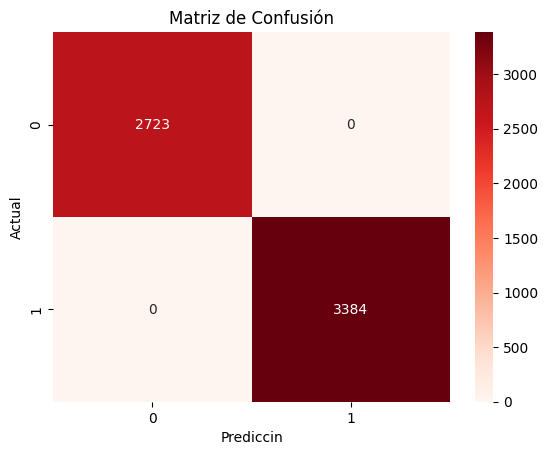

In [ ]:
sns.heatmap(matriz_confusion_validation, annot=True, cmap='Reds', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Prediccin')
plt.ylabel('Actual')
plt.show()

Métricas del set de validación.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
print("RMSE: %f" % (rmse))

RMSE: 0.000000


In [ ]:
roc_auc = roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])
print("ROC AUC SCORE:", roc_auc)

ROC AUC SCORE: 1.0


# Pruebas realizadas

En esta sección están las pruebas realizados en el set de validación en busca de los híper parámetros.



Pruebas:
* Prueba 1: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con solamente features numéricas:
RMSE: 0.461201, ROC AUC SCORE: 0.87774856337182, Matriz de confusión: ([[2093,630],[669,2715]]).

* Prueba 2: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None",con features numéricas, "habitat" y "season":
RMSE: 0.374170, ROC AUC SCORE: 0.9368132118569683, Matriz de confusión: ([[2287,436],[419,2965]]).

* Prueba 3: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con features numéricas, "does-bruise-or-bleed", "habitat" y "season":
RMSE: 0.337348, ROC AUC SCORE: 0.956939354713243,Matriz de confusión: ([[2369,354],[341,3043]]).

* Prueba 4: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con features numéricas, "does-bruise-or-bleed", "has-ring", "habitat" y "season":
RMSE: 0.307112, ROC AUC SCORE: 0.9668071931684304,Matriz de confusion: ([[2405,318],[258,3126]]).

* Prueba 5: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con features numéricas, "cap-color", "gill-color", "stem-color":
RMSE: 0.172632, ROC AUC SCORE: 0.9942523477877359,Matriz de confusión: ([[2639,84],[98,3286]]).

* Prueba 6: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con todas las
features sin Nans imputados:
RMSE: 0.073509, ROC AUC SCORE: 0.9989480317824955,Matriz de confusión: ([[2701,22],[11,3373]]).

* Prueba 7: Con "n_estimators" = 10, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con todas las features sin Nans imputados, "gill-attachment" y "gill-spacing":
RMSE: 0.012796, ROC AUC SCORE: 0.9999998914769466,Matriz de confusión: ([[2722,1],[0,3384]]).

* Prueba 8: Con "n_estimators" = 11, "min_samples_split" = 3, "min_samples_leaf" = 1,"max_features" = 3, "max_depth" = "None", con todas las features sin Nans imputados , "gill-attachment" y "gill-spacing":
RMSE: 0.018097, ROC AUC SCORE: 0.99999983721542,Matriz de confusión: ([[2722,1],[1,3383]]).

* Prueba 9: Con "n_estimators" = 12, "min_samples_split" = 2, "min_samples_leaf" = 1,"max_features" = 1, "max_depth" = "None", con todas las features sin Nans imputados, "gill-attachment" y "gill-spacing":
RMSE: 0.018097, ROC AUC SCORE: 0.9999991860771,Matriz de confusión: ([[2722,1],[1,3383]]).

* Prueba 10: Con "n_estimators" = 12, "min_samples_split" = 2, "min_samples_leaf" = 2,"max_features" = 1, "max_depth" = "None", con todas las features sin Nans imputados, "gill-attachment", "ring-type" y "gill-spacing":
RMSE: 0.000000, ROC AUC SCORE: 1.0, Matriz de confusión([[2723, 0],[0,3384]]).

Para este ejercicio, decidí ir agregando columnas de poco y ver las métricas e importancias de las features por cada prueba. Una vez que obtuve buenos resultados, para conseguir un Roc Auc Score de 1, empecé a probar distintos valores de híper parámetros modificando el diccionario de "params" hasta conseguir el resultado buscado.




# Importancias de las Features por prueba

En esta sección se encuentra la evolución de la importancia de las features dependiendo de la prueba.
Si bien esto no está pedido en el enunciado, decidí incluirlo para ver cómo van evolucionando las features a medida que busco los híper parámetros y en especial, al agregar o eliminar columnas.


In [ ]:
def sumar_importancias(df_importancias, df_importancias_sumadas, features_individuales, feature):

  suma_importancias = 0

  for i in features_individuales:
    suma_importancias += df_importancias[i].sum()
  df_importancias_sumadas[feature] = suma_importancias

In [ ]:
importancias_individuales = pd.DataFrame(model.feature_importances_).T
importancias_individuales.columns = X_train.columns
importancias_sumadas = pd.DataFrame()
importancias_sumadas['cap-diameter'] = importancias_individuales['cap-diameter']
importancias_sumadas['stem-height'] = importancias_individuales['stem-height']
importancias_sumadas['stem-width'] = importancias_individuales['stem-width']
sumar_importancias(importancias_individuales, importancias_sumadas, ['b0','c0','f0','o0','p0','s0','x0'], 'cap-shape')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b2','e2','g2','k2','l2','n2','o2','p2','r2','u2','w2','y2'], 'cap-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f3', 't3'], 'does-bruise-or-bleed')
sumar_importancias(importancias_individuales, importancias_sumadas, ['a4','d4','e4','f4','o4','p4','s4','x4'], 'gill-attachment')
sumar_importancias(importancias_individuales, importancias_sumadas, ['c5','d5','f5','o5'], 'gill-spacing')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b6','e6','f6','g6','k6','n6','o6', 'p6','r6','u6','w6','y6'], 'gill-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['b9','e9','f9','g9','k9','l9','n9','o9','p9','r9','u9','w9','y9'], 'stem-color')
sumar_importancias(importancias_individuales, importancias_sumadas, ['f12','t12'], 'has-ring')
sumar_importancias(importancias_individuales, importancias_sumadas, ['e13','f13','g13','l13','m13','o13','p13','r13','z13'], 'ring-type')
sumar_importancias(importancias_individuales, importancias_sumadas, ['d15','g15','h15','l15','m15','p15','u15','w15'], 'habitat')
sumar_importancias(importancias_individuales, importancias_sumadas, ['a16','s16','u16','w16'], 'season')
importancias_sumadas = importancias_sumadas.T.rename(columns={0:"Importancia"})

Prueba 1

Text(0, 0.5, 'Feature')

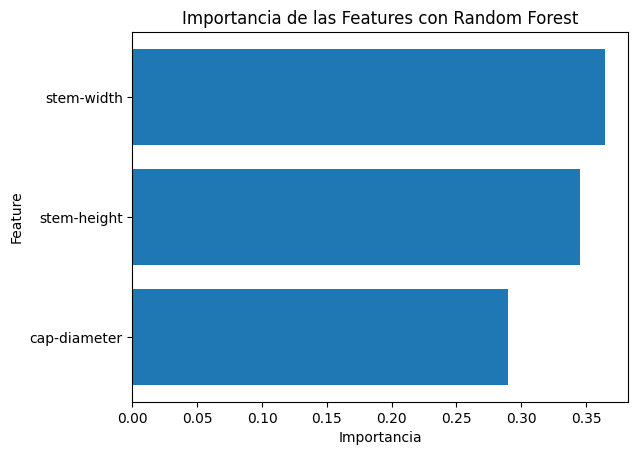

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 2

Text(0, 0.5, 'Feature')

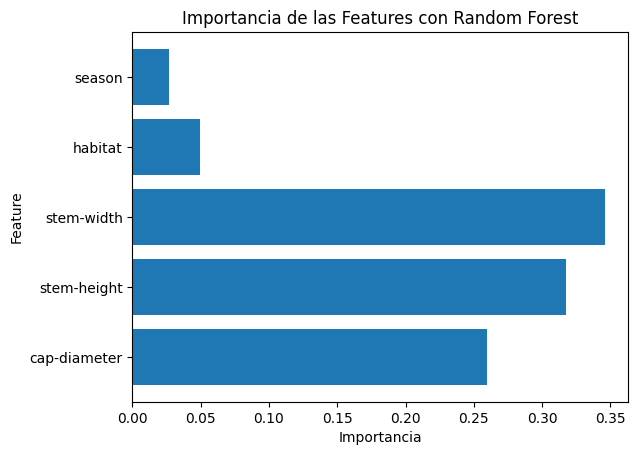

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 3

Text(0, 0.5, 'Feature')

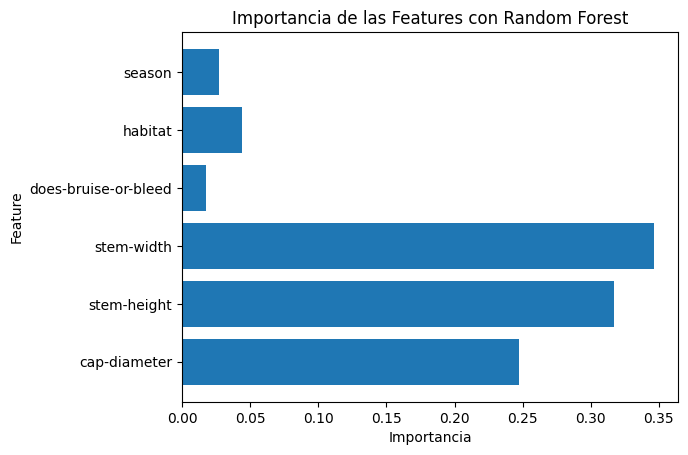

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 4

Text(0, 0.5, 'Feature')

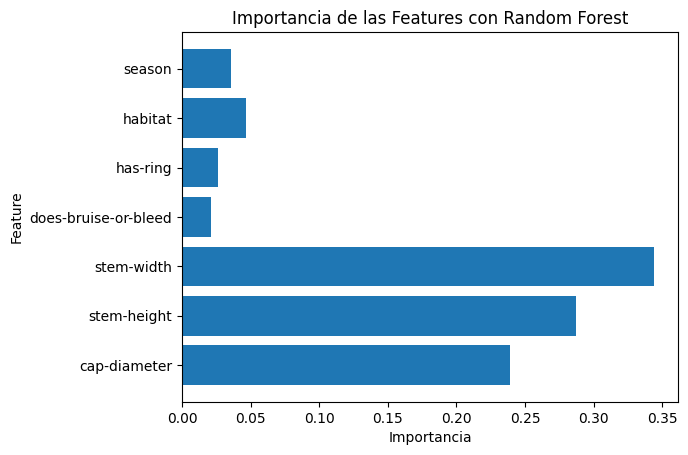

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 5

Text(0, 0.5, 'Feature')

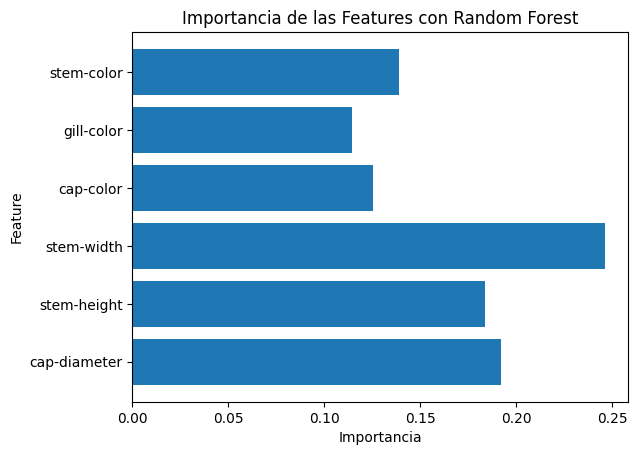

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 6

Text(0, 0.5, 'Feature')

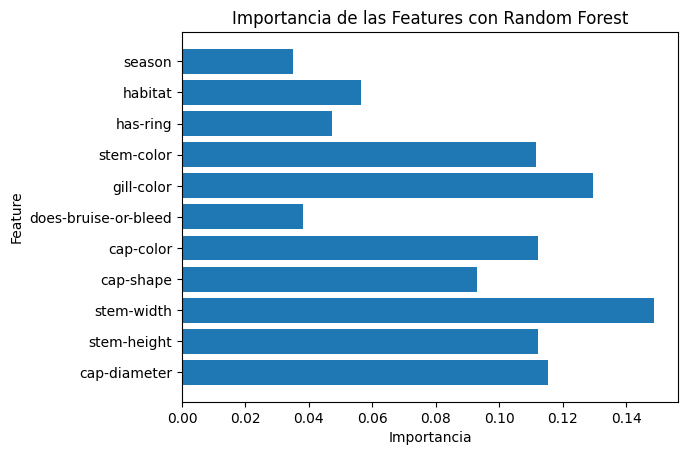

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 7

Text(0, 0.5, 'Feature')

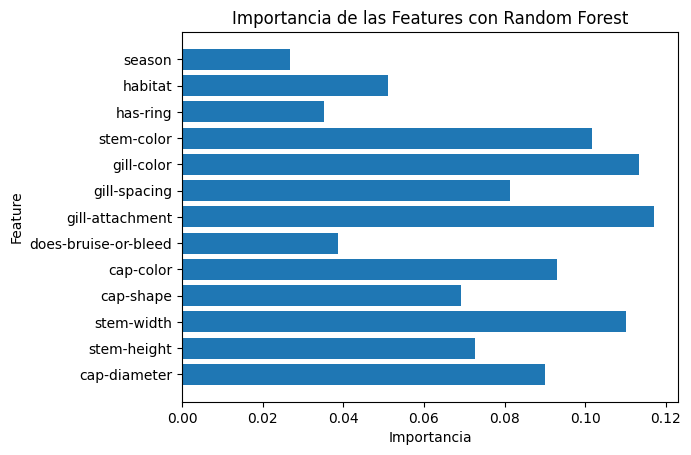

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Pruebo 8

Text(0, 0.5, 'Feature')

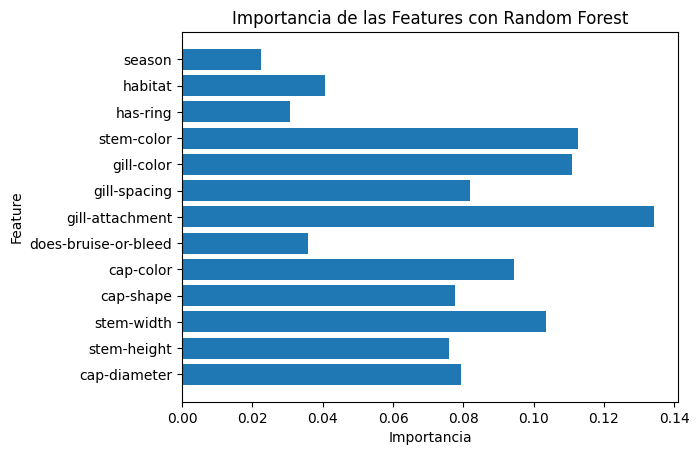

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

Prueba 9

Text(0, 0.5, 'Feature')

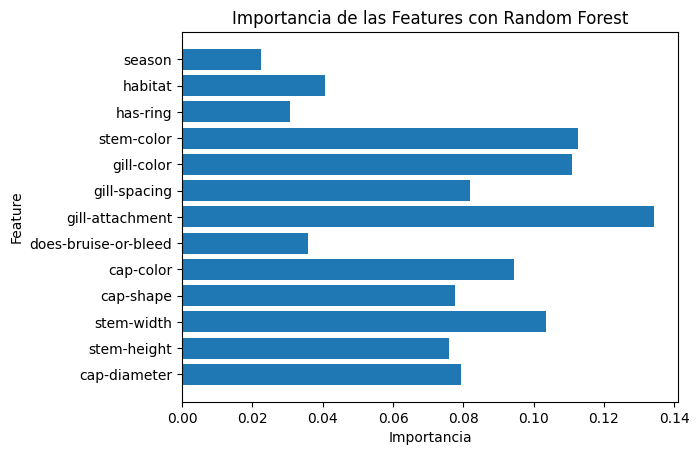

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

# Importancia de las Features para la última prueba (Ejercicio extra)

En esta sección esta la importancia final al obtener un Auc Roc Score de 1 para la última prueba realizada, obtenida al finalizar la etapa de entrenamiento.


Prueba 10

Text(0, 0.5, 'Feature')

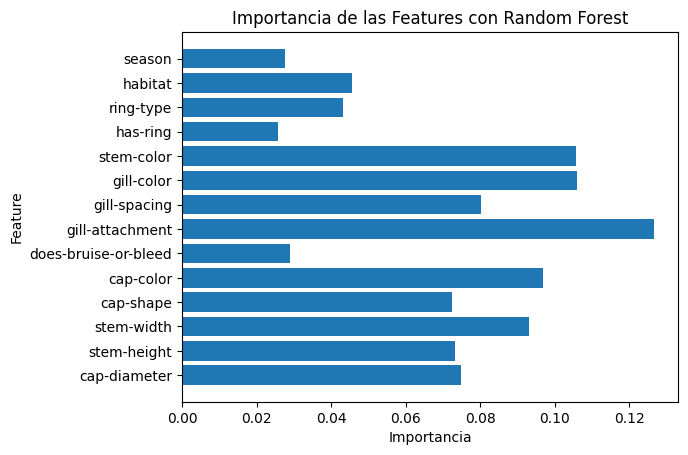

In [ ]:
plt.barh(importancias_sumadas.index, importancias_sumadas["Importancia"],align='center')
plt.title("Importancia de las Features con Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Feature")

En este caso y en relación a las importancias de las features de la parte 2, podemos ver a simple vista que al no utilizar todas las columnas, es muy probable que las importancias sean bastante distintas, no obstante puedo realizar las comparaciones.
Al igual que en la Regresión Logística, las feautres de "sason", "does-bruise-or-bleed" y "has-ring" mantienen un rango de importancia menor y similar. Las features numéricas; "stem-height", "cap-diameter" y en especial "stem-widht" son mucho mas importantes para el Random Forest en comparación a la parte 2, que prácticamente poseen importancia nula. A su vez, las features mas importantes para ambos modelos no coinciden en nada, en donde "gill-attachment", "gill-color", "stem-color" y "cap-color" y "stem-width" son de gran valor para este modelo, pero aportan muy poco para la Regresión Logística, en donde tal como se dijo en la parte 2, las más features mas significativas para este segundo modelo son "veil-color", "habitat", "spore-print-color", "stem-root" y "stem-surface".


Aclaracion: Para esta parte no se realizo el testo en test ya que no se pide en el enunciado.